In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

## Download HSC PSF model at given position

* Using the `PSF Picker` prepared by NAOJ, we can get a point spread function (PSF) model at any observed positions (RA, Dec). 
* The PSF will be delivered as a FITS image file.
* The size of the PSF model output is `43 x 43 pixels`, which is about `7.2" x 7.2"`. Unfortunately you can not change the size of the PSF model.
    - The median HSC seeing in i-band has `FWHM ~ 0.6"`; even in the worst case, the HSC seeing still has `FWHM < 1.2"`, so this size is good enough for most applications. 

* This is very similar to get the cutout image. Please see [this demo](https://github.com/dr-guangtou/unagi/blob/master/demo/demo_hsc_cutout.ipynb) for more details.
    * **Center**: RA, Dec of position to get PSF model. Should be a `Astropy` `SkyCoord` object
    * **Centered**: If checked, the center position of the PSF will always be the center of the image. By default (unchecked), the center position of the PSF will be the (RA, Dec) projected to the image coordinate system, and the center position will therefore be shifted by subpixel from the center of the image. Default is **True**
    * **Type**: `coadd` or `warp`:
        - If you select "coadd" (default), you will get a PSF of a coadd image. The PSF will be delivered as a single FITS image.
        - If you select "warp", you will get PSFs of warped images. The PSFs will be delivered as an uncompressed tarball. "Warp" images are images made from CCD images by coordinate transformation. They are added pixel by pixel to be a corresponding coadd image.

In [6]:
from unagi import config
from unagi import hsc
from unagi import plotting
from unagi.task import hsc_psf

pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_dud')
#pdr2 = hsc.Hsc(dr='dr3', rerun='s20a_dud')

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s20a_dud/s20a_dud_tables.fits


In [7]:
coord = SkyCoord(150.091344, 2.20591, frame='icrs', unit='deg')

# Filters
filters = 'i'

# Output dir
output_dir = 'data/'

### Running the `hsc_psf()` task

# Retrieving coadd PSF model in filter: i


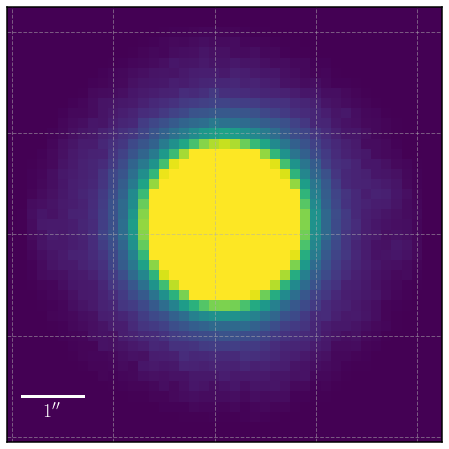

In [8]:
# Get single band PSF image

psf_model = hsc_psf(coord, filters='i', archive=pdr2, output_dir=output_dir)

_ = plotting.display_single(psf_model[0].data, scale_bar_length=1.0)

# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z', 'y']
# Retrieving coadd PSF model in filter: g
# Retrieving coadd PSF model in filter: r
# Retrieving coadd PSF model in filter: i
# Retrieving coadd PSF model in filter: z
# Retrieving coadd PSF model in filter: y


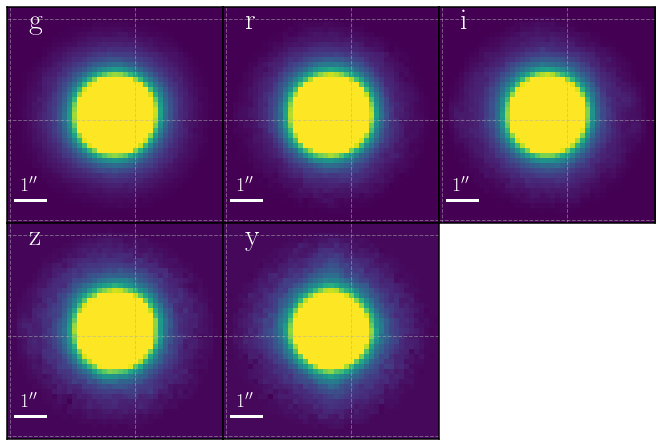

In [9]:
# Get 5-band PSF models
filter_labels = [r"$\rm {}$".format(f) for f in ['g', 'r', 'i', 'z', 'y']]

psf_models = hsc_psf(coord, filters='grizy', archive=pdr2, save_output=False)

_ = plotting.display_all(psf_models, hdu_index=0, img_size=3, label_list=filter_labels,
                         scale_bar_length=1.0, scale_bar_y_offset=1.5, fontsize=30, fontcolor='w')